In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import itertools
import time

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

dataset = datasets.ImageFolder('gdrive/MyDrive/COMP338_Assignment2_Dataset/Training', transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [5]:
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))

In [8]:
# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [135]:
import sklearn
from sklearn.model_selection import train_test_split

train_x = np.array(images)
train_y = np.array(labels)
train_x.shape

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

train_x = train_x.reshape(54000, 3, 250, 250)
train_x  = torch.from_numpy(train_x)
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)
train_x.shape, train_y.shape

ValueError: ignored

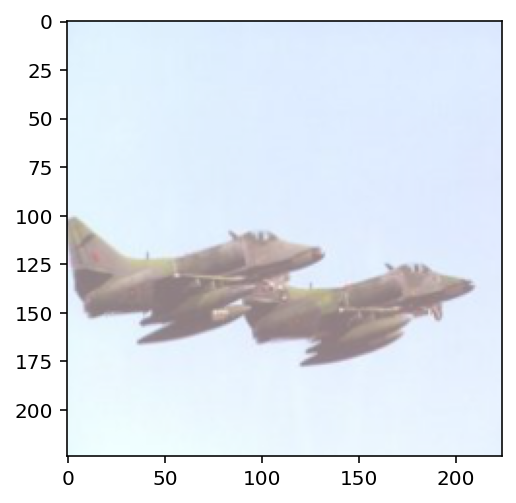

In [13]:
from google.colab.patches import cv2_imshow
import numpy as np

imshow(images[15])

350


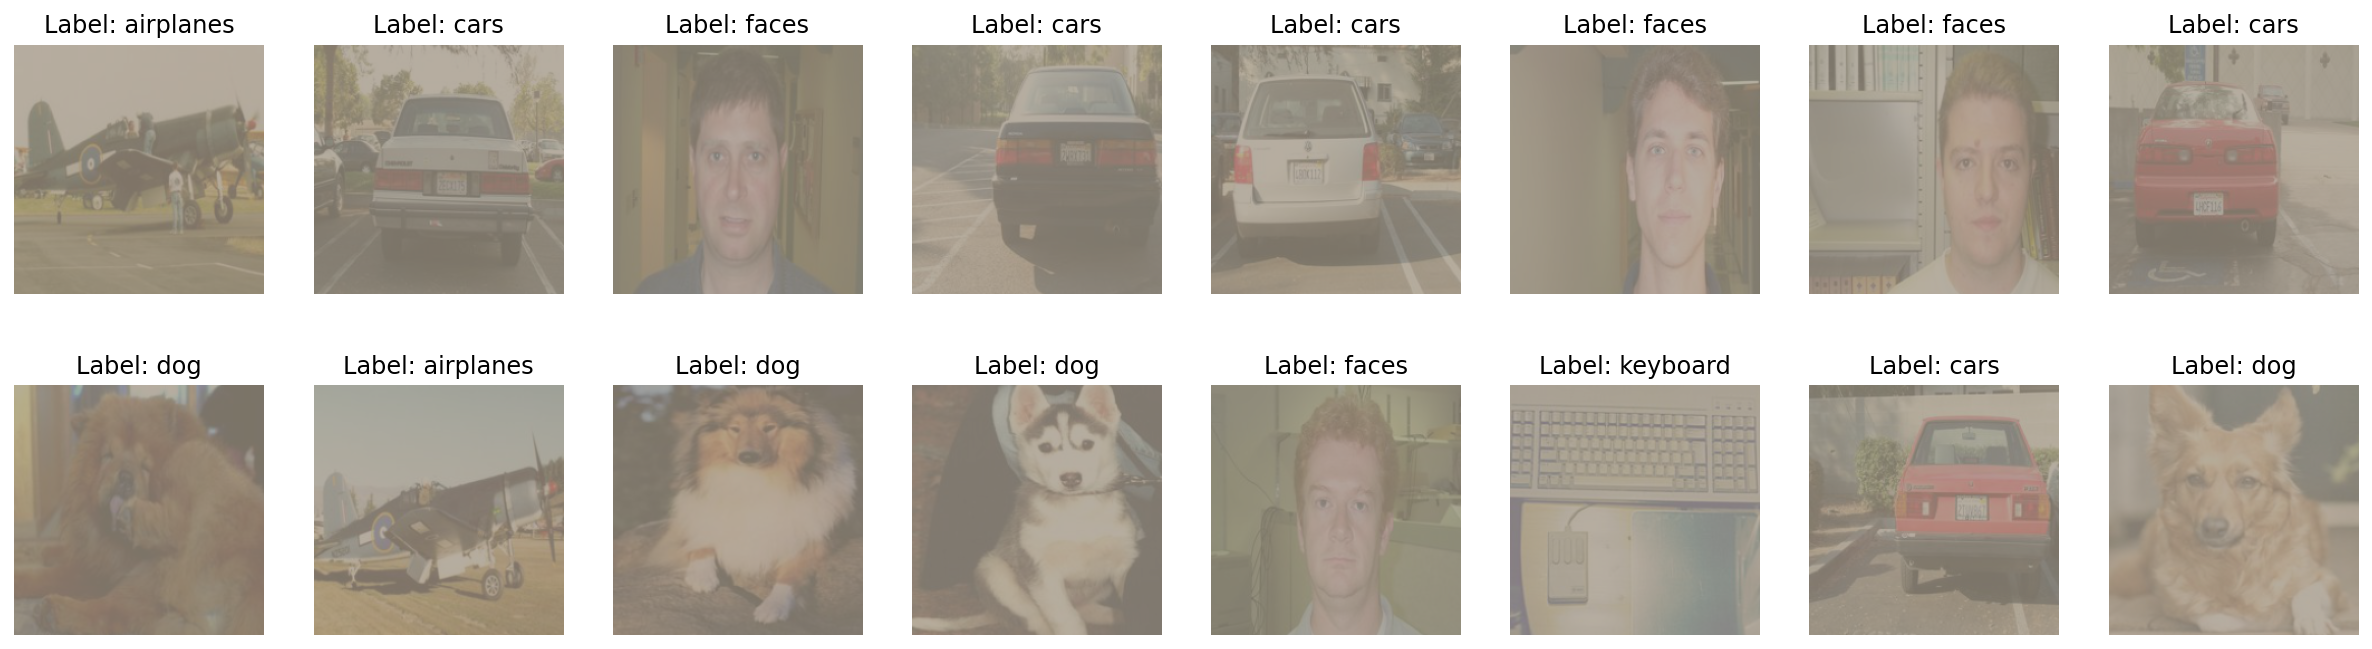

In [153]:
def showimages(imgs,actual_lbls,pred_lbls=None):
   
  fig = plt.figure(figsize=(21,12))
 
  for i,img in enumerate(imgs):
     
    fig.add_subplot(4,8, i+1)
    y=actual_lbls[i]
     
    if pred_lbls!=None:
      y_pre=pred_lbls[i]
      title="prediction: {0}\nlabel:{1}".format(dataset.classes[y],dataset.classes[y_pre])
    else: 
      title="Label: {0}".format(dataset.classes[y])
 
    plt.title(title)
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.axis("off")
    plt.imshow(img)
   
plt.show()
 
inputs, classes = next(iter(dataloader))
 
showimages(inputs,classes)

print(len(dataset))

### TESTING ###

In [151]:
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.cnn_layers = Sequential(

            # First Hidden Layer
            Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            BatchNorm2d(64),
            ReLU(inplace=True),

            # Second Hidden Layer (Pooling Layer 1)
            MaxPool2d(kernel_size=3, stride=2, padding=0),

            # Third Hidden Layer
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(64),
            ReLU(inplace=True),

            # Fourth Hidden Layer (Pooling Layer 2)
            MaxPool2d(kernel_size=3, stride=2, padding=0),
        )

        self.linear_layers = Sequential(
            # Fully Connected Layer
            Linear(3 * 250 * 250, 64)
        )


     # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [113]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(

            # First Hidden Layer
            Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            BatchNorm2d(64),
            ReLU(inplace=True),
        )

        self.layer2 = nn.Sequential(
            # Second Hidden Layer (Pooling Layer 1)
            MaxPool2d(kernel_size=3, stride=2, padding=0),
        )

        self.layer3 = nn.Sequential(
            # Third Hidden Layer
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(64),
            ReLU(inplace=True),
        )

        self.layer4 = nn.Sequential(
            # Fourth Hidden Layer (Pooling Layer 2)
            MaxPool2d(kernel_size=3, stride=2, padding=0),
        )

        self.fc = nn.Linear(3 * 250 * 250, 5)

        '''self.linear_layers = nn.Sequential(
            # Fully Connected Layer
            Linear(3 * 250 * 250, 64 * 5)
        )'''

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0),-1)
        #out = self.relu(self.fc(out))
        out = self.fc(out)
        return out
     # Defining the forward pass    
    '''def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x'''

In [123]:
class SimpleConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(SimpleConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.conv1 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        
        # cf comments in forward() to have step by step comments
        # on the shape (how we pass from a 3x32x32 input image to a 18x16x16 volume)
        self.fc1 = nn.Linear(18 * 16 * 16, 64) 
        #self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32 (Recall: (N -F+2P)/S+1) = (32-3+2*1)/1+1=32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16 (Recall: (N -F+2P)/S+1) = (32-2+2*0)/2+1 = 16
        x = self.pool(x)
        # 18x16x16 -> 4608
        x = x.view(-1, 18 * 16 * 16)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        # The softmax non-linearity is applied later (cf createLossAndOptimizer() fn)
        x = self.fc2(x)
        return x

In [114]:
def softmaxProbabiities(e):
  sm = nn.Softmax2d()
  e = sm(e)
  print(e)

In [115]:
def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

In [116]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 20000 # Max: 50 000 - n_val_samples
n_val_samples = 5000
n_test_samples = 5000

train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))
# (In the last case, indexes do not need to account for training ones because the train=False parameter in datasets.CIFAR will select from the test set)

In [117]:
import torch as th

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True
  th.cuda.manual_seed(seed)

# Define default device, we should use the GPU (cuda) if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")

In [118]:
import torch

# Data Loader #

def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=2)

# Use larger batch size for validation to speed up computation
val_loader = torch.utils.data.DataLoader(dataset, batch_size=32, sampler=val_sampler,
                                          num_workers=2)

In [137]:
def train(net, batch_size, n_epochs, learning_rate):
    """
    Train a neural network and print statistics of the training
    
    :param net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = dataloader #get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        print("1")
        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            print("2")
            # zero the parameter gradients
            optimizer.zero_grad()
            print("3")
            # forward + backward + optimize
            print(inputs)
            outputs = net(inputs)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            print("4")
            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()

            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

In [152]:
model = CNN()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()

#x = torch.randn(2, 3, 37, 37)


train_history, val_history = train(model, batch_size=16, n_epochs=20, learning_rate=0.01)

===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.01
1
2
3
tensor([[[[0.4196, 0.4235, 0.4275,  ..., 0.4941, 0.4941, 0.4941],
          [0.4196, 0.4235, 0.4275,  ..., 0.4980, 0.4980, 0.4980],
          [0.4235, 0.4235, 0.4275,  ..., 0.4980, 0.4980, 0.4980],
          ...,
          [0.5529, 0.5725, 0.6196,  ..., 0.4824, 0.4863, 0.4863],
          [0.5725, 0.5176, 0.5725,  ..., 0.4902, 0.4902, 0.4902],
          [0.5294, 0.4784, 0.5059,  ..., 0.4980, 0.4980, 0.4980]],

         [[0.4784, 0.4824, 0.4863,  ..., 0.5804, 0.5804, 0.5804],
          [0.4824, 0.4863, 0.4902,  ..., 0.5843, 0.5843, 0.5843],
          [0.4863, 0.4863, 0.4902,  ..., 0.5843, 0.5843, 0.5843],
          ...,
          [0.6157, 0.6353, 0.6824,  ..., 0.5843, 0.5882, 0.5882],
          [0.6314, 0.5804, 0.6314,  ..., 0.5882, 0.5882, 0.5882],
          [0.5882, 0.5373, 0.5686,  ..., 0.5922, 0.5922, 0.5922]],

         [[0.2353, 0.2353, 0.2392,  ..., 0.2588, 0.2627, 0.2627],
          [0.2392, 0.2392,

RuntimeError: ignored

In [42]:
def train55(net, batch_size, n_epochs, learning_rate): 
    """
    Train a neural network and print statistics of the training
    
    :param net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []
    
    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        print("I AM AN EPOCH")

        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            print("Hello 0")
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            print(inputs)
            outputs = net(inputs)
            print("Hello")
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()


            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history